## Limpieza de datos Red Neuronal

### 1. Importación de librerías 

In [1]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(seed)


# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#cambiar variables ordinales a numericas
from sklearn.preprocessing import OrdinalEncoder
#Escalar los numeros
from sklearn.preprocessing import MinMaxScaler
#Agregado para randomForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor ,RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

#Agregado para seleccion de features PCA
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Agregado para la seleccion de features RFECV
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
import matplotlib 
# Seaborn
import seaborn as sns 
%matplotlib inline
plt.style.use('fivethirtyeight')

#Librrias para el balanceo de los datos 
# check version number
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#Librerias para metrica ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#para red neuronal
# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


### 2. Carga de los datos

In [2]:
# Se cargan los datos. 
#los atributos 'sep' y 'encoding' son para verificar el formato de los datos, por ejemplo
#si los datos vienen separados por ; en ves de , se puede cambiar aqui y evitar problemas en el cargue
#el 'index_col' indica en que columna se encuentra el 'indice' de los datos 
df_tracks=pd.read_csv('UNSW_NB15_training-set.csv', sep=',', encoding = 'utf-8', index_col=0)

In [3]:
# Cantidad de datos y número de variables
df_tracks.shape

(82332, 44)

In [4]:
# Mostrar los datos
df_tracks.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,...,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,1,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,1,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,...,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,...,2,2,1,3,0,0,0,2,3,0,Normal,0


In [5]:
#  Veamos cuantas ausencias hay para todas las variables:
df_tracks.isna().sum().sort_values(ascending=False)

dur                  0
proto                0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
tcprtt               0
dwin                 0
dtcpb                0
dttl                 0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
sload                0
stcpb                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
label      

### 2. Limpieza y preparación de los datos

In [6]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
df_tracks_t = df_tracks.copy()

In [7]:
df_tracks_t.shape

(82332, 44)

- Para el tratamiento de los datos, inicialmente realizamos un perfilamiento de los mismos por medio del método **ProfileReport** , gracias a este método podemos observar las características de los datos, además podemos observar la cantidad de valores únicos, la existencia de nulos, el tipo de dato y otras varias características que nos resultan útiles.

In [8]:
#Descripcion de los datos 
#profile = ProfileReport(df_tracks_t, title="Pandas Profiling Report")
#profile

## 2.1 Creacion de variable de decision binaria

In [9]:
df_tracks_t['fuzzer_attack'] = 0
df_tracks_t.loc[df_tracks_t['attack_cat'] ==  'Fuzzers'  ,'fuzzer_attack'] = 1

In [10]:
df_tracks_t[['attack_cat','fuzzer_attack']].sample(1)

,attack_cat,fuzzer_attack
id,,
72591,Normal,0


## 2.2 Eliminacion de columnas descartadas inicialmente

In [11]:
# Eliminación las columnas nominales
df_tracks_t = df_tracks_t.drop(['attack_cat'], axis=1)
df_tracks_t = df_tracks_t.drop(['label'], axis=1)

-Se decide eliminar las columnas relacionadas a los datos de características del flujo ya que son datos informativos sobre caracteristicas unicas de flujo como la direccion y puerto de origen y destino y para el caso de estudio no son muy necesarias
:
* **1.**	Srcip :  Source IP address : No ... 
* **2.**	Sport : Source pot number : No
* **3.**	Dstip : Destiantion IP addres : No
* **4.**	Dsport : destination port number : No
* **5.**	Tcprtt: la suma de synack (34) y ackdat(35) del TCP: No
                    (es una mezcla de otras columnas)

In [12]:
# Eliminación columnas que no aportan valor
#df_tracks_t = df_tracks_t.drop(['srcip'], axis=1)
#df_tracks_t = df_tracks_t.drop(['sport'], axis=1)
#df_tracks_t = df_tracks_t.drop(['dstip'], axis=1)
#df_tracks_t = df_tracks_t.drop(['dsport'], axis=1)

In [13]:
df_tracks_t = df_tracks_t.drop(['response_body_len'], axis=1)
df_tracks_t = df_tracks_t.drop(['tcprtt'], axis=1)

In [14]:
#elmina las FILAS con algun nulo
df_tracks_t = df_tracks_t.dropna()

In [15]:
df_tracks_t.shape

(82332, 41)

## 2.3 Conversion de variables categoricas a numericas

- Identificamos las variables numéricas y las **variables categóricas** con una cantidad de categorías razonables (en el caso particular del problema son **proto, service y state**). Procedemos a transformar Las **variables categóricas a numéricas** (guardamos las nuevas variables en “proto-encoded” y “numeric_atacck_cat”), en este caso se decidido hacerlo manualmente pues no había demasiadas categorias y el algoritmo acepta esta conversión.

#### **2.3.1** Se decice convertir **Proto** a numerica

In [16]:
#df_tracks_t['proto'].unique()

In [17]:
#generamos un encoder 
encoder = OrdinalEncoder(categories=[['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',
       'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer',
       'ipx-n-ip', 'pgm', 'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp',
       'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
       'sccopmce', 'iplt', 'pipe', 'sps', 'ib']])

In [18]:
# Ajustamos el codificador con la variable protocol y la transformamos
#Transformamos la variable a numerica 
#Se probara quitando la columna mas adelante 
encoder.fit(df_tracks_t[["proto"]])
df_tracks_t["proto-encoded"] = encoder.transform(df_tracks_t[["proto"]])

In [19]:
df_tracks_t[["proto-encoded", "proto"]].sample(5)

,proto-encoded,proto
id,,
37072,2.0,tcp
25398,2.0,tcp
39314,2.0,tcp
10031,2.0,tcp
81711,2.0,tcp


In [20]:
# Eliminación las columnas categorica
df_tracks_t = df_tracks_t.drop(['proto'], axis=1)

In [21]:
df_tracks_t.head(5)

,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,fuzzer_attack,proto-encoded
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,1,1,2,0,0,0,1,2,0,0,0.0
2,0.000008,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,1,1,2,0,0,0,1,2,0,0,0.0
3,0.000005,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,1,1,3,0,0,0,1,3,0,0,0.0
4,0.000006,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,2,2,1,3,0,0,0,2,3,0,0,0.0
5,0.000010,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,2,2,1,3,0,0,0,2,3,0,0,0.0


#### **2.3.2** Se decide convertir **Service y State** a columnas binarias con el One Hot Encoding

In [22]:
df_tracks_t[['service','state']].sample(5)

,service,state
id,,
30499,-,FIN
67548,-,FIN
73921,-,INT
76441,-,FIN
18206,dns,INT


In [23]:
df_tracks_t['state'].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [24]:
#genera columnas binarias por cada categoria de la propiedad
df_tracks_t=pd.get_dummies(data=df_tracks_t, columns=['state'])

In [25]:
df_tracks_t

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,fuzzer_attack,proto-encoded,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,-,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,...,1,2,0,0,0.0,0,0,0,0,1,0,0
2,0.000008,-,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,...,1,2,0,0,0.0,0,0,0,0,1,0,0
3,0.000005,-,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,...,1,3,0,0,0.0,0,0,0,0,1,0,0
4,0.000006,-,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,...,2,3,0,0,0.0,0,0,0,0,1,0,0
5,0.000010,-,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,...,2,3,0,0,0.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,0.000005,-,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,...,2,1,0,0,0.0,0,0,0,0,1,0,0
82329,1.106101,-,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,...,3,2,0,0,2.0,0,0,0,1,0,0,0
82330,0.000000,-,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,...,1,1,1,0,1.0,0,0,0,0,1,0,0


In [26]:
df_tracks_t[['service']].value_counts()

service 
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
dtype: int64

In [27]:
#genera columnas binarias por cada categoria de la propiedad
df_tracks_t=pd.get_dummies(data=df_tracks_t, columns=['service'])

In [28]:
df_tracks_t.shape

(82332, 59)

## 2.4 Eliminacion de duplicados 

In [29]:
#por defoult deja el primer registro que aparece
df_tracks_t = df_tracks_t.drop_duplicates()
df_tracks_t.shape

(54433, 59)

<h2>2.5 Reescalar/Normalziar</h2>

In [30]:
trans = MinMaxScaler()
trans.fit(df_tracks_t)

df_tracks_t = pd.DataFrame(trans.transform(df_tracks_t), columns = df_tracks_t.columns)
df_tracks_t.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,...,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
count,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,...,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000,54433.000000
mean,0.017062,0.002317,0.002334,0.000780,0.001341,0.037564,0.595543,0.534227,0.008575,0.045607,0.001270,0.001688,...,0.000294,0.111899,0.023717,0.021623,0.144967,0.000092,0.006999,0.000110,0.032315,0.000441,0.003748,0.000551
std,0.065918,0.015072,0.012803,0.014370,0.012670,0.113613,0.418475,0.464240,0.036942,0.138741,0.014582,0.012388,...,0.017142,0.315245,0.152168,0.145450,0.352071,0.009584,0.083370,0.010498,0.176837,0.020993,0.061104,0.023470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000049,0.000282,0.000182,0.000035,0.000012,0.000024,0.121569,0.114625,0.000002,0.000080,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006320,0.000845,0.000726,0.000060,0.000024,0.000067,0.996078,0.996047,0.000008,0.000267,0.000376,0.000182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.015514,0.001409,0.001634,0.000149,0.000122,0.003671,0.996078,0.996047,0.000196,0.010863,0.000752,0.000726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>2.6 Feature Selection</h2>

<h2>2.6 Balanceo de datos SMOTE</h2>

In [31]:
df_tracks_t[['fuzzer_attack']].value_counts()

fuzzer_attack
0.0              49595
1.0               4838
dtype: int64

In [32]:
df_fuzzer= df_tracks_t[(df_tracks_t['fuzzer_attack']==1.0)]

In [33]:
df_normal= df_tracks_t[(df_tracks_t['fuzzer_attack']==0.0)]

In [34]:
counter = Counter(df_tracks_t['fuzzer_attack'])
print(counter)

Counter({0.0: 49595, 1.0: 4838})


In [35]:
# transform the dataset
oversample = SMOTE()

In [36]:
# Se selecciona la variable objetivo, en este caso "fuzzer_attack".
Y = df_tracks_t['fuzzer_attack']
# Del conjunto de datos se elimina la variable "fuzzer_attack"
X = df_tracks_t
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
X_train_res['fuzzer_attack'].value_counts()
X_train_res=X_train_res.drop(['fuzzer_attack'], axis=1)
X_train=X_train_res
Y_train=y_train_res
X_test=X_test.drop(['fuzzer_attack'], axis=1)

Number transactions X_train dataset:  (43546, 59)
Number transactions y_train dataset:  (43546,)
Number transactions X_test dataset:  (10887, 59)
Number transactions y_test dataset:  (10887,)
After OverSampling, the shape of train_X: (79360, 59)
After OverSampling, the shape of train_y: (79360,) 

After OverSampling, counts of label '1': 39680
After OverSampling, counts of label '0': 39680


In [37]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [38]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (79360, 58)
After OverSampling, the shape of train_y: (79360,) 

After OverSampling, counts of label '1': 39680
After OverSampling, counts of label '0': 39680


In [39]:
#X_train_res['fuzzer_attack'].value_counts()

In [40]:
#X_train_res=X_train_res.drop(['fuzzer_attack'], axis=1)

- Elegimos la variable objetivo, que en este caso sería **fuzzer_attack** y posteriormente **la eliminamos de nuestros datos**

<h2>3. Modelo Redes Neuronales <h3>

In [41]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )
#X_train
#Y_train
modelo_1.fit(X=X_train, y=Y_train)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=1000,
              random_state=123, solver='lbfgs')

### PCA

In [ ]:
pca = PCA(n_components = 0.95, random_state=seed)
pca.fit(X_train)
pca.n_components_
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#### Entrenamiento del modelo

nota:  sin pca :   , con pca : 

In [42]:
#Entrenamos el modelo y verificamos el accuracy score (precision)
score = modelo_1.score(X_train, Y_train)
print("Score: ", score)

Score:  0.8874495967741935


**CROSS VALIDATION :**

In [ ]:
#--------------SVM--------------------
#Anteriormente se dividio el data set en entrenamiento y test
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [43]:
#Realizamos la variacion de parametros cross validation para LA RED NEURONAL
cv_scores = cross_val_score(modelo_1, X_train, Y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.89


***REPORTE DE METRICAS :***
una vez obtenido el mejor estimador por medio del cross Validation lo probamos con los datos de test para obtener el valor a reportar al negocio

In [44]:
#generamos la matriz de confusion luego del cross validation
ypred = modelo_1.predict(X_test)
ypredTrain = modelo_1.predict(X_train)

cm = confusion_matrix(Y_test, ypred)
print(cm)


[[8680 1235]
 [ 138  834]]


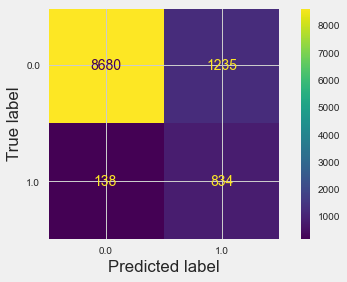

In [46]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_1, X_test, Y_test)  
plt.show()

In [47]:
#generamos un reporte de metricas para validar las otras metricas de presicion
#Clasficacion
#print(classification_report(y_test, y_pred))

print('Matriz de confusion')
print(confusion_matrix(Y_test,ypred))
print("------------")

print('Accuracy')
print(accuracy_score(Y_test, ypred))
print("----------------------------------------")

print('Train')
print(classification_report(Y_train, ypredTrain))
print("---------------------------------------")
print('Test')
print(classification_report(Y_test, ypred))

Matriz de confusion
[[8680 1235]
 [ 138  834]]
------------
Accuracy
0.8738862863966198
----------------------------------------
Train
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89     39680
         1.0       0.88      0.90      0.89     39680

    accuracy                           0.89     79360
   macro avg       0.89      0.89      0.89     79360
weighted avg       0.89      0.89      0.89     79360

---------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      9915
         1.0       0.40      0.86      0.55       972

    accuracy                           0.87     10887
   macro avg       0.69      0.87      0.74     10887
weighted avg       0.93      0.87      0.89     10887



***PROMEDIO (sin SMOTE):***

In [48]:
train = []
test = []
X=X.drop(['fuzzer_attack'], axis=1)
for i in range(10):
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    # Declare
    modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )
    
    modelo_1.fit(X_train, Y_train)
    y_pred_train = modelo_1.predict(X_train)
    y_pred_test = modelo_1.predict(X_test)
    
    train.append(accuracy_score(Y_train, y_pred_train))
    test.append(accuracy_score(Y_test, y_pred_test))
    
    
print('Exactitud sobre entrenamiento: %.3f' % np.mean(train))
print('Exactitud sobre test: %.3f' % np.mean(test))

Exactitud sobre entrenamiento: 0.938
Exactitud sobre test: 0.938


***REPORTE FINAL :***  se reporta a negocio una exactitud  
* 0.938 sin balanceo 
* 0.931(utilizando el balanceo de datos SMOTE 
(sin variacion de parametros)

In [49]:
#Clasficacion
#print(classification_report(y_test, y_pred))
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

print('Matriz de confusion')
print(confusion_matrix(Y_test,y_pred_test))
print("------------")

print('Accuracy')
print(accuracy_score(Y_test, y_pred_test))
print("----------------------------------------")

print('Train')
print(classification_report(Y_train, y_pred_train))
print("---------------------------------------")
print('Test')
print(classification_report(Y_test, y_pred_test))

Matriz de confusion
[[9727  200]
 [ 397  563]]
------------
Accuracy
0.9451639570129512
----------------------------------------
Train
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     39668
         1.0       0.72      0.55      0.63      3878

    accuracy                           0.94     43546
   macro avg       0.84      0.77      0.80     43546
weighted avg       0.94      0.94      0.94     43546

---------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      9927
         1.0       0.74      0.59      0.65       960

    accuracy                           0.95     10887
   macro avg       0.85      0.78      0.81     10887
weighted avg       0.94      0.95      0.94     10887



# Curva roc
* Cuanto más esté hacia la izquierda la curva, más área habrá contenida bajo ella y por ende, mejor será el clasificador
* valor de AUC comprendido entre 0.5 (clasificador aleatorio) y 1.0 (clasificador perfecto).

In [50]:
# Predecimos las probabilidades
#clf = CalibratedClassifierCV(modelo_1) 
#clf.fit(X_train, Y_train)
lr_probs = modelo_1.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

In [51]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(Y_test))]

In [52]:
# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Random Forest: ROC AUC=0.948


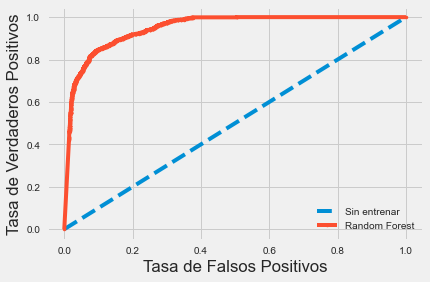

In [53]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

<h2>Variacion de parametros</h2>

In [55]:
# Gridsearch to determine the value of C
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

#X_train
#Y_train
grid.fit(X = X_train, y = Y_train)


# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
19,0.1,"(20, 20)",0.001,0.956069,0.001855,0.958331,0.000665
33,0.1,"(20, 20)",1.0,0.955013,0.002476,0.958021,0.000666
10,0.1,"(20, 20)",0.1,0.954944,0.001297,0.958389,0.001142
32,0.01,"(20, 20)",0.001,0.954577,0.002265,0.958102,0.001045
0,0.001,"(20, 20)",0.1,0.954255,0.001566,0.956804,0.000887
26,0.001,"(20, 20)",0.001,0.954186,0.002205,0.957252,0.001453
39,0.01,"(20, 20)",0.01,0.953865,0.001054,0.957930,0.000133
44,0.01,"(20, 20)",0.1,0.953773,0.002340,0.957711,0.000458
4,0.01,"(20, 20)",10.0,0.953773,0.001032,0.955725,0.001104
2,0.001,"(20, 20)",0.01,0.953566,0.001914,0.956632,0.000950


In [56]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 20), learning_rate_init=0.1,
              max_iter=2000, solver='lbfgs')

***METRICAS FINALES :***

Reentrenamos el algoritmo con los hiperparametros seleccionados

In [58]:
train = []
test = []
#X=X.drop(['fuzzer_attack'], axis=1)
for i in range(10):
    # Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    #Entrenamos con el mejor estimador
    # Declare
   
    
    modelo.fit(X_train, Y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    train.append(accuracy_score(Y_train, y_pred_train))
    test.append(accuracy_score(Y_test, y_pred_test))
    
print('sin SMOTE')
print('Exactitud sobre entrenamiento: %.3f' % np.mean(train))
print('Exactitud sobre test: %.3f' % np.mean(test))

sin SMOTE
Exactitud sobre entrenamiento: 0.957
Exactitud sobre test: 0.956


***REPORTE FINAL :***  se reporta a negocio una exactitud  
* 0.956 sin balanceo 
* 0.931(utilizando el balanceo de datos SMOTE 
(sin variacion de parametros)

1. Precisión: Porcentaje de predicciones positivas correctas respecto al total de predicciones positivas.
2. recall: Porcentaje de predicciones positivas correctas en relación con el total de positivos reales.
3. F1 score : una media armónica ponderada de precisión y recall. Cuanto más cerca de 1, mejor es el modelo.

In [59]:
#Clasficacion
#print(classification_report(y_test, y_pred))
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

print('Matriz de confusion')
print(confusion_matrix(Y_test,y_pred_test))
print("------------")

print('Accuracy')
print(accuracy_score(Y_test, y_pred_test))
print("----------------------------------------")

print('Train')
print(classification_report(Y_train, y_pred_train))
print("---------------------------------------")
print('Test')
print(classification_report(Y_test, y_pred_test))

Matriz de confusion
[[9790  137]
 [ 322  638]]
------------
Accuracy
0.9578396252411132
----------------------------------------
Train
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     39668
         1.0       0.82      0.64      0.72      3878

    accuracy                           0.96     43546
   macro avg       0.90      0.81      0.85     43546
weighted avg       0.95      0.96      0.95     43546

---------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      9927
         1.0       0.82      0.66      0.74       960

    accuracy                           0.96     10887
   macro avg       0.90      0.83      0.86     10887
weighted avg       0.96      0.96      0.96     10887



# Curva# Curva roc
* Cuanto más esté hacia la izquierda la curva, más área habrá contenida bajo ella y por ende, mejor será el clasificador
* valor de AUC comprendido entre 0.5 (clasificador aleatorio) y 1.0 (clasificador perfecto). roc

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.972


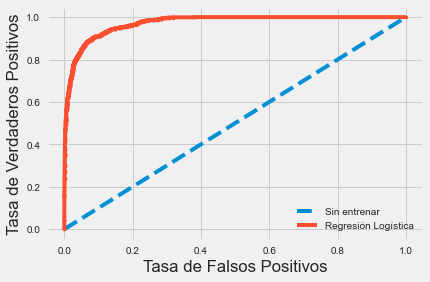

In [60]:
# Predecimos las probabilidades
lr_probs = modelo.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(Y_test))]

# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()